ЛАБОРАТОРНАЯ РАБОТА 2.1. Интерполяционные полиномы приближения табличных функций.

ПОЛИНОМ НЬЮТОНА СЛЕВА-НАПРАВО (ВПЕРЕД)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ООФ: интервал от -2 до бесконечности
def f(x):
    return x ** 2 - np.sqrt(np.log10(x+3))

In [3]:
#ООФ: любые числа
def g(x):
    return x ** 3-0.2 * x ** 2 + 0.4 * abs(x) + 1.4

In [4]:
#Границы отрезка и количество узлов
a = -2
b = 2
n = 10

In [ ]:
def nodes(a, b, n, f, p): 
    ''' Функция возвращает x_list - сетку и y_list - сеточную функцию
        a и b - границы отрезка,
        n - количество точек,
        f - функция,
        p - параметр, 1 - равномерная сетка, 2 - Чебышевская сетка ''' 
    x_list = list()
    y_list = list()
    if p == 1:
        x_list = np.linspace(a, b, n)
        for i in range(n):
            y_list.append(f(x_list[i]))
    if p == 2:
        for i in range(n):
            xi = (b - a) / 2 * np.cos(np.pi * (2 * i + 1) / (2 * n)) + (b + a) / 2
            x_list.append(xi)
        for i in range(n):
            y_list.append(f(x_list[i]))
        x_list = np.flip(np.array(x_list))
        y_list = np.flip(np.array(y_list))
    return [x_list, y_list]

In [6]:
x_f_uniform = nodes(a, b, n, f, 1)[0]
y_f_uniform = nodes(a, b, n, f, 1)[1]
x_g_uniform = nodes(a, b, n, g, 1)[0]
y_g_uniform = nodes(a, b, n, g, 1)[1]

x_f_cheb = nodes(a, b, n, f, 2)[0]
y_f_cheb = nodes(a, b, n, f, 2)[1]
x_g_cheb = nodes(a, b, n, g, 2)[0]
y_g_cheb = nodes(a, b, n, g, 2)[1]

In [ ]:
def polynomial(x, x_list, y_list):
    ''' Функция возвращает значение полинома в точке x
        x_list - сетка
        y_list - сеточка функция'''
    n = len(x_list)
    
    def separated_differences(x_list, y_list):
        ''' Функция считает разделенные разности, нужные для построения полинома
            table - таблица, в которую помещаются разделённые разности, 
            функция возвращает первую строку таблицы - разделённые разности, которые участвуют в построении полинома'''
        table = np.zeros((n, n))
        for i in range(n):
            table[i][0] = y_list[i]
        for j in range(1, n):
            for i in range(n - j):
                table[i][j] = (table[i + 1][j - 1] - table[i][j - 1]) / (x_list[i + j] - x_list[i])
        return table[0]
    

    diff = separated_differences(x_list, y_list)
    result = diff[0] 
    product = 1.0
    ''' В цикле строится полином!
        значение полинома хранится в result'''
    for i in range(1, n):
        product *= (x - x_list[i - 1])  
        result += diff[i] * product  
    
    return result

In [8]:
#Проверочная сетка
test_grid = np.linspace(a, b, 500)

Построим графики интерполяции для разных функций для равномерной сетки и сетки Чебышева и графики поточечных ошибок для разных случаев

In [9]:
from math import factorial

def theory_error(a, b, f, x_nods, net):

    n = len(x_nods)

    def f_derivative(f, x, h = 1e-5):
        return (f(x + h) - f(x)) / h
    
    def higher_order_derivative(f, x, n, h=1e-5):
        if n == 0:
            return f(x)
        elif n == 1:
            return (f_derivative(f, x, h=1e-5))
        return f_derivative(lambda x: higher_order_derivative(f, x, n - 1, h), x, h)
    
    x_values = np.linspace(a, b, 1000)
    y_values = higher_order_derivative(f, x_values, n, h=1e-5)
    max_value = np.max(y_values)

    error =  np.abs([(max_value / factorial(n)) * np.prod([(x - x_nods[i]) for i in range(n)]) for x in net])

    return error

theory = theory_error(a, b, f, x_f_uniform[::4], test_grid)

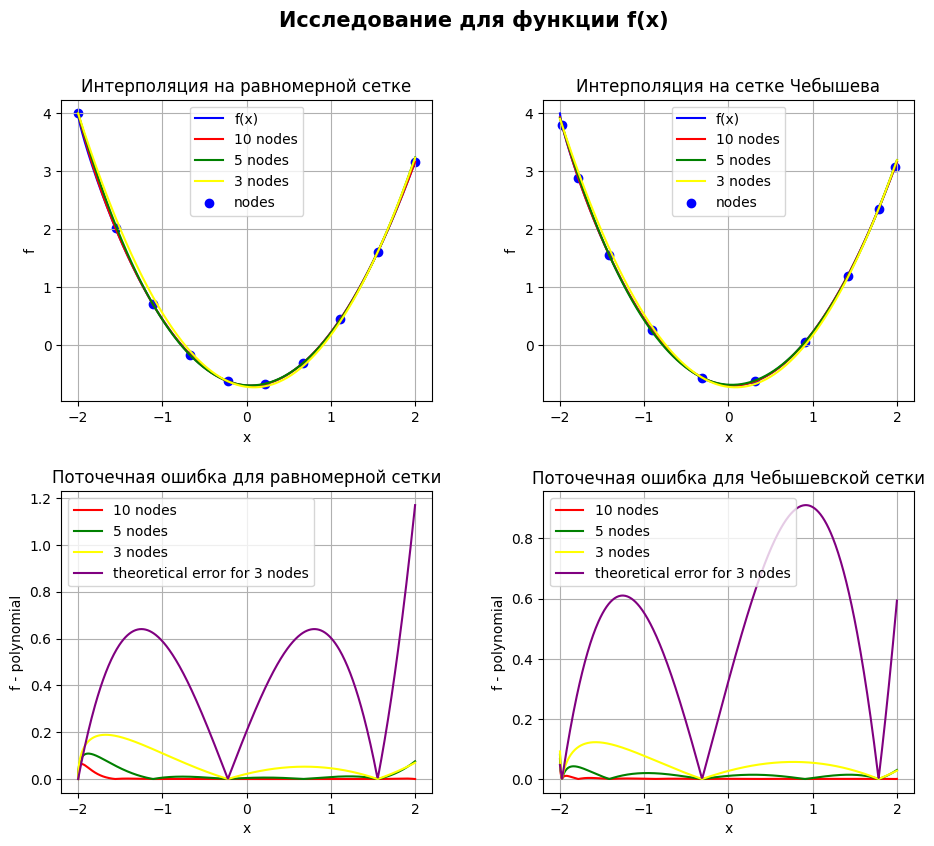

In [28]:
plt.figure(figsize=[11, 9])
plt.suptitle('Исследование для функции f(x)', fontsize=15, fontweight='bold')

plt.subplot(2,2,1)
plt.plot(test_grid, f(test_grid), label = 'f(x)', color = 'blue')
plt.plot(test_grid, polynomial(test_grid, x_f_uniform, y_f_uniform), color = 'red', label = '10 nodes')
plt.plot(test_grid, polynomial(test_grid, x_f_uniform[::2], y_f_uniform[::2]), color = 'green', label = '5 nodes')
plt.plot(test_grid, polynomial(test_grid, x_f_uniform[::4], y_f_uniform[::4]), color = 'yellow', label = '3 nodes')
plt.scatter(x_f_uniform, y_f_uniform, color = 'blue', label = 'nodes')
plt.grid('True')
plt.legend()
plt.xlabel('x')
plt.ylabel('f')
plt.title('Интерполяция на равномерной сетке')

plt.subplot(2,2,2)
plt.plot(test_grid, f(test_grid), label = 'f(x)', color = 'blue')
plt.plot(test_grid, polynomial(test_grid, x_f_cheb, y_f_cheb), color = 'red', label = '10 nodes')
plt.plot(test_grid, polynomial(test_grid, x_f_cheb[::2], y_f_cheb[::2]), color = 'green', label = '5 nodes')
plt.plot(test_grid, polynomial(test_grid, x_f_cheb[::4], y_f_cheb[::4]), color = 'yellow', label = '3 nodes')
plt.scatter(x_f_cheb, y_f_cheb, color = 'blue', label = 'nodes')
plt.grid('True')
plt.legend()
plt.xlabel('x')
plt.ylabel('f')
plt.title('Интерполяция на сетке Чебышева')

plt.subplot(2,2,3)
plt.plot(test_grid, abs(f(test_grid) - polynomial(test_grid, x_f_uniform, y_f_uniform)), color = 'red', label = '10 nodes')
plt.plot(test_grid, abs(f(test_grid) - polynomial(test_grid, x_f_uniform[::2], y_f_uniform[::2])), color = 'green', label = '5 nodes')
plt.plot(test_grid, abs(f(test_grid) - polynomial(test_grid, x_f_uniform[::4], y_f_uniform[::4])), color = 'yellow', label = '3 nodes')
plt.plot(test_grid, theory_error(a, b, f, x_f_uniform[::4], test_grid), color = 'purple', label = 'theoretical error for 3 nodes')
plt.grid('True')
plt.legend()
plt.xlabel('x')
plt.ylabel('f - polynomial')
plt.title('Поточечная ошибка для равномерной сетки')

plt.subplot(2,2,4)
plt.plot(test_grid, abs(f(test_grid) - polynomial(test_grid, x_f_cheb, y_f_cheb)), color = 'red', label = '10 nodes')
plt.plot(test_grid, abs(f(test_grid) - polynomial(test_grid, x_f_cheb[::2], y_f_cheb[::2])), color = 'green', label = '5 nodes')
plt.plot(test_grid, abs(f(test_grid) - polynomial(test_grid, x_f_cheb[::4], y_f_cheb[::4])), color = 'yellow', label = '3 nodes')
plt.plot(test_grid, theory_error(a, b, f, x_f_cheb[::4], test_grid), color = 'purple', label = 'theoretical error for 3 nodes')
plt.grid('True')
plt.legend()
plt.xlabel('x')
plt.ylabel('f - polynomial')
plt.title('Поточечная ошибка для Чебышевской сетки')

plt.subplots_adjust(wspace=0.3, hspace=0.3)

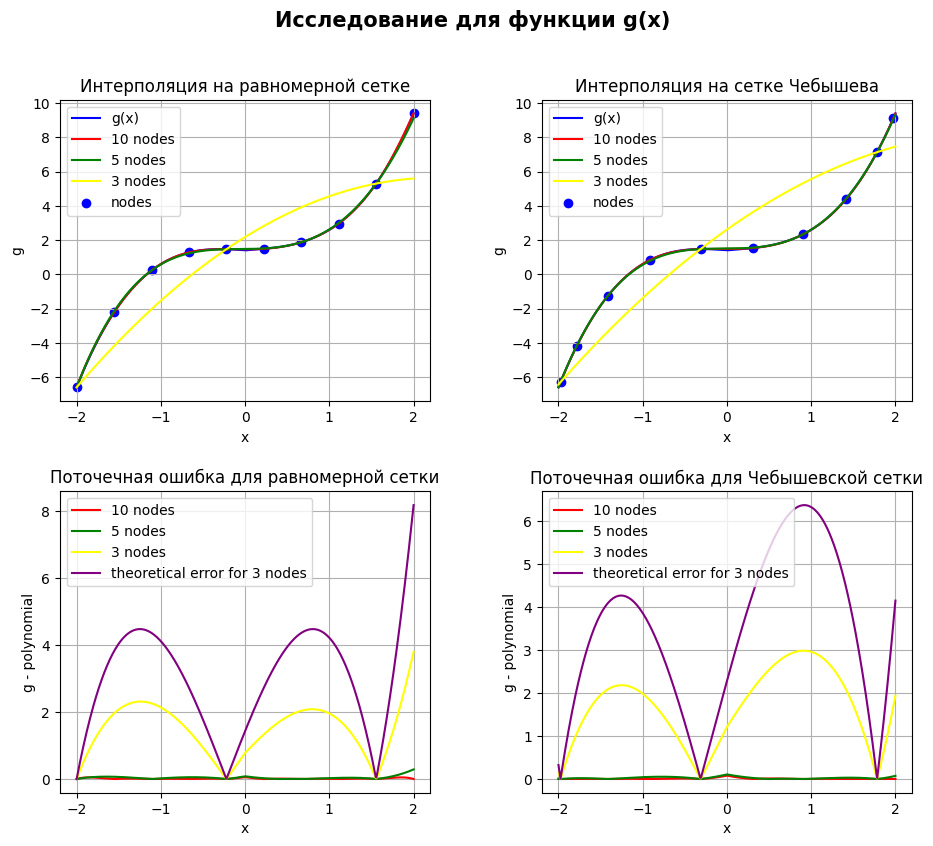

In [58]:
plt.figure(figsize=[11, 9])
plt.suptitle('Исследование для функции g(x)', fontsize=15, fontweight='bold')

plt.subplot(2,2,1)
plt.plot(test_grid, g(test_grid), label = 'g(x)', color = 'blue')
plt.plot(test_grid, polynomial(test_grid, x_g_uniform, y_g_uniform), color = 'red', label = '10 nodes')
plt.plot(test_grid, polynomial(test_grid, x_g_uniform[::2], y_g_uniform[::2]), color = 'green', label = '5 nodes')
plt.plot(test_grid, polynomial(test_grid, x_g_uniform[::4], y_g_uniform[::4]), color = 'yellow', label = '3 nodes')
plt.scatter(x_g_uniform, y_g_uniform, color = 'blue', label = 'nodes')
plt.grid('True')
plt.legend()
plt.xlabel('x')
plt.ylabel('g')
plt.title('Интерполяция на равномерной сетке')

plt.subplot(2,2,2)
plt.plot(test_grid, g(test_grid), label = 'g(x)', color = 'blue')
plt.plot(test_grid, polynomial(test_grid, x_g_cheb, y_g_cheb), color = 'red', label = '10 nodes')
plt.plot(test_grid, polynomial(test_grid, x_g_cheb[::2], y_g_cheb[::2]), color = 'green', label = '5 nodes')
plt.plot(test_grid, polynomial(test_grid, x_g_cheb[::4], y_g_cheb[::4]), color = 'yellow', label = '3 nodes')
plt.scatter(x_g_cheb, y_g_cheb, color = 'blue', label = 'nodes')
plt.grid('True')
plt.legend()
plt.xlabel('x')
plt.ylabel('g')
plt.title('Интерполяция на сетке Чебышева')

plt.subplot(2,2,3)
plt.plot(test_grid, abs(g(test_grid) - polynomial(test_grid, x_g_uniform, y_g_uniform)), color = 'red', label = '10 nodes')
plt.plot(test_grid, abs(g(test_grid) - polynomial(test_grid, x_g_uniform[::2], y_g_uniform[::2])), color = 'green', label = '5 nodes')
plt.plot(test_grid, abs(g(test_grid) - polynomial(test_grid, x_g_uniform[::4], y_g_uniform[::4])), color = 'yellow', label = '3 nodes')
plt.plot(test_grid, theory_error(a, b, g, x_g_uniform[::4], test_grid), color = 'purple', label = 'theoretical error for 3 nodes')
plt.grid('True')
plt.legend()
plt.xlabel('x')
plt.ylabel('g - polynomial')
plt.title('Поточечная ошибка для равномерной сетки')

plt.subplot(2,2,4)
plt.plot(test_grid, abs(g(test_grid) - polynomial(test_grid, x_g_cheb, y_g_cheb)), color = 'red', label = '10 nodes')
plt.plot(test_grid, abs(g(test_grid) - polynomial(test_grid, x_g_cheb[::2], y_g_cheb[::2])), color = 'green', label = '5 nodes')
plt.plot(test_grid, abs(g(test_grid) - polynomial(test_grid, x_g_cheb[::4], y_g_cheb[::4])), color = 'yellow', label = '3 nodes')
plt.plot(test_grid, theory_error(a, b, g, x_g_cheb[::4], test_grid), color = 'purple', label = 'theoretical error for 3 nodes')
plt.grid('True')
plt.legend()
plt.xlabel('x')
plt.ylabel('g - polynomial')
plt.title('Поточечная ошибка для Чебышевской сетки')

plt.subplots_adjust(wspace=0.3, hspace=0.3)

Построим графики максимальной ошибки на отрезке в зависимости от числа узлов для разных функций и разных сеток

In [12]:

nod = np.arange(5, 50)
net = np.linspace(a, b, 500)

def interpolation_error(f, nod, net, p):
    ''' Функция возвращает массив максимальных ошибок интерполяции 
        на данной сетке для разного количества узлов
        f - рассматриваемая функция
        nod - массив количества узлов
        net - сетка
        p - параметр, отвечающий за тип сетки, на которой строится полином
            p = 1 - равномерная сетка
            p = 2 - сетка Чебышева'''
    
    f_x_plot = f(net)
    grids = list()
    grid_funcs = list()
    
    #Создаём много сеток и сеточных функций, соответсвующих разному количеству узлов
    for i in nod:
        x_nodes, y_nodes = nodes(a, b, i, f, p)
        grids.append(x_nodes)
        grid_funcs.append(y_nodes)

    def max_error(f_list, net, x_list, y_list):
        ''' Функция возвращает максимальную ошибку интерполяции для на проверочной сетке
            f_list - массив значений рассматриваемой функции на сетке net
            x_list - сетка, на которой строится полином
            y_list - сеточная функция'''
        poly_x_plot = [polynomial(x, x_list, y_list) for x in net]
        vec_error = abs(f_list - poly_x_plot)
        return np.max(vec_error)
    
    
    return [max_error(f_x_plot, net, x, y) for x, y in zip(grids, grid_funcs)]

In [13]:
nod = np.arange(3, 60)
net = np.linspace(a, b, 500)

In [14]:
errors_f = interpolation_error(f, nod, net, 1)
errors_f_cheb = interpolation_error(f,  nod, net, 2)

In [15]:
errors_g = interpolation_error(g, nod, net, 1)
errors_g_cheb = interpolation_error(g, nod, net, 2)

Text(0.5, 1.0, 'Функция g(x)')

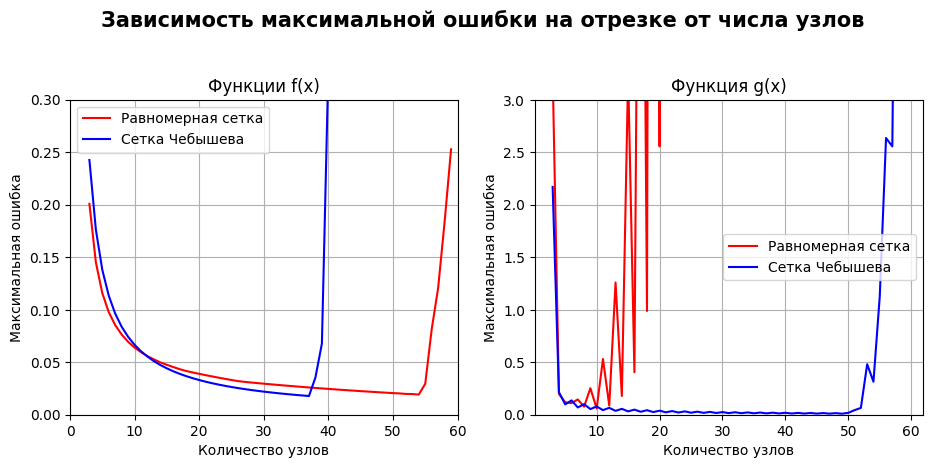

In [16]:
plt.figure(figsize=[11, 9])

plt.suptitle('Зависимость максимальной ошибки на отрезке от числа узлов', fontsize=15, fontweight='bold')
plt.subplot(2,2,1)
plt.plot(nod, errors_f, color = 'red', label = 'Равномерная сетка')
plt.plot(nod, errors_f_cheb, color = 'blue', label = 'Сетка Чебышева')
plt.grid('True')
plt.legend()
plt.xlabel('Количество узлов')
plt.ylabel('Максимальная ошибка')
plt.ylim(0, 0.3)
plt.xlim(0, 60)
plt.title('Функции f(x)')

plt.subplot(2,2,2)
plt.plot(nod, errors_g, color = 'red', label = 'Равномерная сетка')
plt.plot(nod, errors_g_cheb, color = 'blue', label = 'Сетка Чебышева')
plt.grid('True')
plt.legend()
plt.xlabel('Количество узлов')
plt.ylabel('Максимальная ошибка')
plt.ylim(0, 3)
#plt.xlim(0, 60)
plt.title('Функция g(x)')



Зависимость ошибки в выбранных точках от степени интерполяционного полинома 

In [17]:
print(f'Точка 1: {test_grid[10]}')
print(f'Точка 2: {test_grid[400]}')

Точка 1: -1.9198396793587174
Точка 2: 1.2064128256513023


In [18]:
def error_in_dot(f, nod, dot, p):
    ''' Функция возвращает массив ошибок интерполяции 
        на в данной точке для разного количества узлов
        f - рассматриваемая функция
        nod - массив количества узлов
        dot - координата данной точки
        p - параметр, отвечающий за тип сетки, на которой строится полином
            p = 1 - равномерная сетка
            p = 2 - сетка Чебышева'''
    
    f_x_plot = f(dot)
    grids = list()
    grid_funcs = list()
    
    #Создаём много сеток и сеточных функций, соответсвующих разному количеству узлов
    for i in nod:
        x_nodes, y_nodes = nodes(a, b, i, f, p)
        grids.append(x_nodes)
        grid_funcs.append(y_nodes)

    errors = []
    for i in range(len(nod)):
        err = abs(f(dot) - polynomial(dot, grids[i], grid_funcs[i]))
        errors.append(err)
    
    return errors

In [19]:
error_in_dot1_f = error_in_dot(f, nod, test_grid[10], 1)
error_in_dot1_f_cheb = error_in_dot(f, nod, test_grid[10], 2)

error_in_dot2_f = error_in_dot(f, nod, test_grid[400], 1)
error_in_dot2_f_cheb = error_in_dot(f, nod, test_grid[400], 2)

In [20]:
error_in_dot1_g = error_in_dot(g, nod, test_grid[10], 1)
error_in_dot1_g_cheb = error_in_dot(g, nod, test_grid[10], 2)

error_in_dot2_g = error_in_dot(g, nod, test_grid[400], 1)
error_in_dot2_g_cheb = error_in_dot(g, nod, test_grid[400], 2)

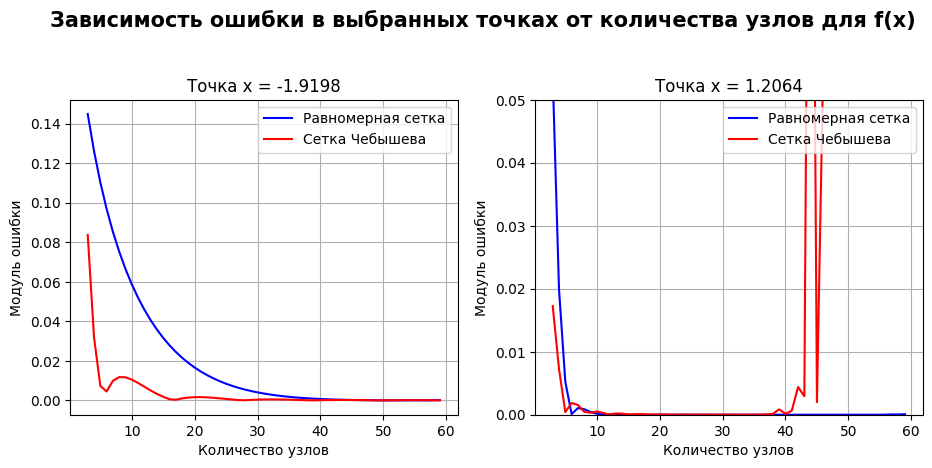

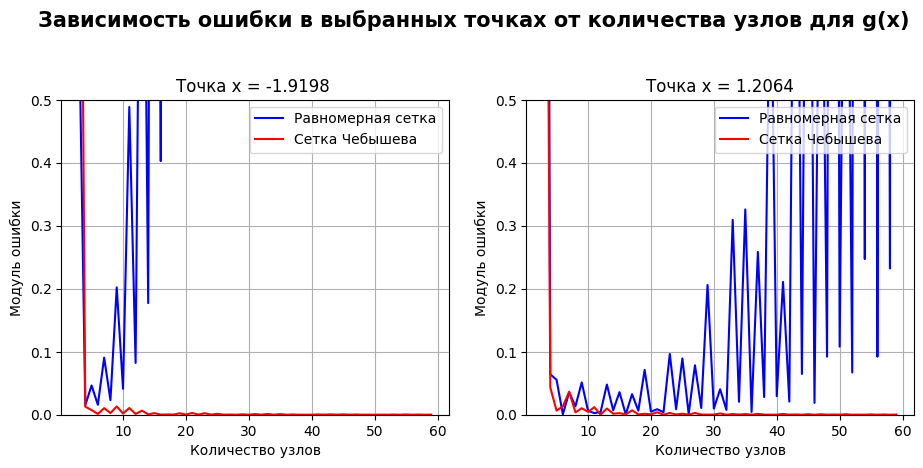

In [31]:
plt.figure(figsize=[11, 9])
plt.suptitle('Зависимость ошибки в выбранных точках от количества узлов для f(x)', fontsize=15, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Точка x = -1.9198')
plt.plot(nod, error_in_dot1_f, color = 'blue', label = 'Равномерная сетка' )  
plt.plot(nod, error_in_dot1_f_cheb, color = 'red', label = 'Сетка Чебышева')  
plt.legend()
plt.xlabel('Количество узлов')
plt.ylabel('Модуль ошибки')
plt.grid('True')

plt.subplot(2,2,2)
plt.title('Точка x = 1.2064')
plt.plot(nod, error_in_dot2_f, color = 'blue', label = 'Равномерная сетка' )  
plt.plot(nod, error_in_dot2_f_cheb, color = 'red', label = 'Сетка Чебышева')  
plt.legend()
plt.xlabel('Количество узлов')
plt.ylabel('Модуль ошибки')
plt.ylim(0, 0.05)
plt.grid('True')

plt.figure(figsize=[11, 9])
plt.suptitle('Зависимость ошибки в выбранных точках от количества узлов для g(x)', fontsize=15, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Точка x = -1.9198 ')
plt.plot(nod, error_in_dot1_g, color = 'blue', label = 'Равномерная сетка' )  
plt.plot(nod, error_in_dot1_g_cheb, color = 'red', label = 'Сетка Чебышева')  
plt.legend()
plt.xlabel('Количество узлов')
plt.ylabel('Модуль ошибки')
plt.ylim(0,0.5)
plt.grid('True')

plt.subplot(2,2,2)
plt.title('Точка x = 1.2064')
plt.plot(nod, error_in_dot2_g, color = 'blue', label = 'Равномерная сетка' )  
plt.plot(nod, error_in_dot2_g_cheb, color = 'red', label = 'Сетка Чебышева')  
plt.legend()
plt.xlabel('Количество узлов')
plt.ylabel('Модуль ошибки')
plt.ylim(0,0.5)
plt.grid('True')


Дополнительное исследование. Зависимость ошибки интерполяционного полинома при возмущении данных

In [ ]:
noise_levels = [1, 2, 3, 4, 5]
num_experiments = 20

In [56]:
def relative_error(true_values, noise_polynomial):
    return np.linalg.norm(true_values - noise_polynomial) / np.linalg.norm(true_values)

def create_noise(data, max_noise_persent):
    noise = np.random.uniform(-max_noise_persent/100, max_noise_persent/100, data.shape)
    return data * (1 + noise)


results_f_uniform = {level: [] for level in noise_levels}
results_f_cheb = {level: [] for level in noise_levels}

results_g_uniform = {level: [] for level in noise_levels}
results_g_cheb = {level: [] for level in noise_levels}

for level in noise_levels:
    for _ in range(num_experiments):
        noisy_values = create_noise(x_f_uniform, level)
        noise_polynomial = np.array([polynomial(x, noisy_values, y_f_uniform) for x in net])
        true_fine_values = np.array([polynomial(x, x_f_uniform, y_f_uniform) for x in net])
        error = 100 * relative_error(true_fine_values, noise_polynomial)
        results_f_uniform[level].append(error)

        noisy_values = create_noise(x_f_cheb, level)
        noise_polynomial = np.array([polynomial(x, noisy_values, y_f_cheb) for x in net])
        true_fine_values = np.array([polynomial(x, x_f_cheb, y_f_cheb) for x in net])
        error = 100 * relative_error(true_fine_values, noise_polynomial)
        results_f_cheb[level].append(error)

        noisy_values = create_noise(x_g_uniform, level)
        noise_polynomial = np.array([polynomial(x, noisy_values, y_g_uniform) for x in net])
        true_fine_values = np.array([polynomial(x, x_g_uniform, y_g_uniform) for x in net])
        error = 100 * relative_error(true_fine_values, noise_polynomial)
        results_g_uniform[level].append(error)
        
        noisy_values = create_noise(x_g_cheb, level)
        noise_polynomial = np.array([polynomial(x, noisy_values, y_g_cheb) for x in net])
        true_fine_values = np.array([polynomial(x, x_g_cheb, y_g_cheb) for x in net])
        error = 100 * relative_error(true_fine_values, noise_polynomial)
        results_g_cheb[level].append(error)

Text(0.5, 1.0, 'Зависимость ошибки интерполяционного полинома при возмущении данных для g(x) на сетке Чебышева')

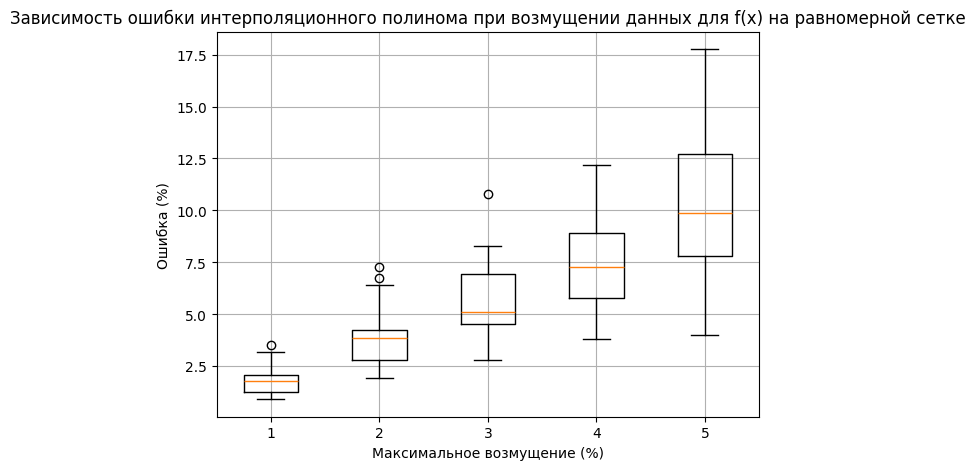

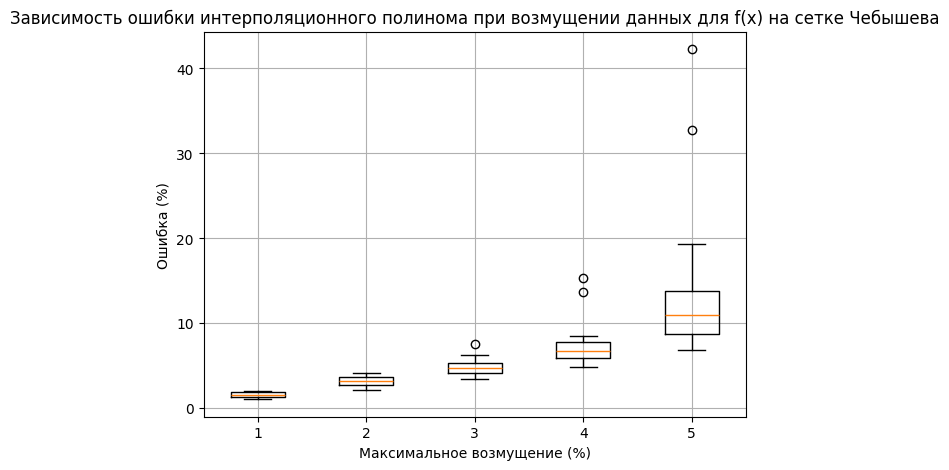

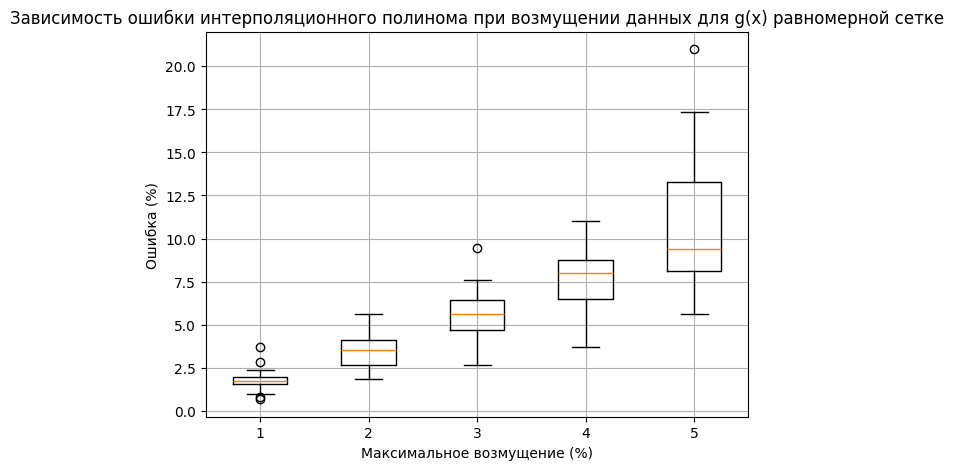

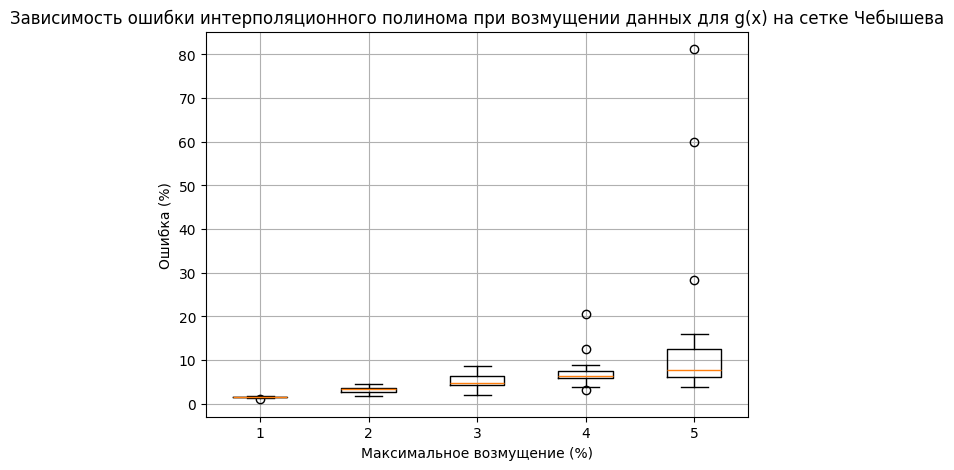

In [57]:
plt.figure(figsize=(7, 5))

plt.boxplot([results_f_uniform[level] for level in noise_levels]);
plt.grid('True')
plt.xlabel('Максимальное возмущение (%)')
plt.ylabel('Ошибка (%)')
plt.title('Зависимость ошибки интерполяционного полинома при возмущении данных для f(x) на равномерной сетке')

plt.figure(figsize=(7, 5))

plt.boxplot([results_f_cheb[level] for level in noise_levels]);
plt.grid('True')
plt.xlabel('Максимальное возмущение (%)')
plt.ylabel('Ошибка (%)')
plt.title('Зависимость ошибки интерполяционного полинома при возмущении данных для f(x) на сетке Чебышева')

plt.figure(figsize=(7, 5))

plt.boxplot([results_g_uniform[level] for level in noise_levels]);
plt.grid('True')
plt.xlabel('Максимальное возмущение (%)')
plt.ylabel('Ошибка (%)')
plt.title('Зависимость ошибки интерполяционного полинома при возмущении данных для g(x) равномерной сетке')

plt.figure(figsize=(7, 5))

plt.boxplot([results_g_cheb[level] for level in noise_levels], label=noise_levels);
plt.grid('True')
plt.xlabel('Максимальное возмущение (%)')
plt.ylabel('Ошибка (%)')
plt.title('Зависимость ошибки интерполяционного полинома при возмущении данных для g(x) на сетке Чебышева')